In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.drop(columns="PassengerId",inplace=True)
target = df["Survived"]

# Intenciones 

En este EDA mi intencio es explorar las caracteristicas de las personas que sobreviven y la de las que no sobreviven 

**Preguntas Interesantes**

1. Ser Mujer mejoraba tus posibilidades de Supervivencia?
2. Que rango etario es el que mas sobrevivia
3. Tener un Status elevado en la sociedad mejoraba tus posibilidades de supervivencia?
4. Gastar mas dinero en Tickets mejoraba tus chances de sobrevivir?
5. Pertenecer a primera clase aumenta tus posibilidades de sobrevivir?
6. Tener hijos hace que tus posibilidades de supervivencia mejoren?
7. Existia camaraderia entre personas que embarcaban en el mismo puerto que mejorara sus chances de sobrevivir?

# Indice 
1. [Missing Values](#handeling-missing-values)
2. [Duplicated Values](#handeling-duplicates)
3. [Analisis de Tipo de Datos](#analisis-de-tipo-de-datos)

# Handeling Missing Values

In [25]:
(df.isna().sum()/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [3]:
df.drop(columns="Cabin",inplace=True)

In [4]:
df["Embarked"].ffill(inplace=True)

In [5]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [6]:
(df.isna().sum()/len(df))*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

# Handeling Duplicates

In [20]:
test = df.duplicated()
df[test]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Analisis de Tipo de Datos

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [3]:
df_numeric = df.select_dtypes(["int64","float64"])
df_objet = df.select_dtypes("object")
df_categorical = df.select_dtypes("object")

In [4]:
# im cleaning the numerical data to only the relevan features
df_numeric.drop(columns=["Survived","PassengerId"],inplace=True)

In [5]:
#im moving Pclass, SibSp and Parch to a categorical df to have it separated
df_categorical["SibSp"] = df_numeric["SibSp"] 
df_categorical["Parch"] = df_numeric["Parch"] 
df_categorical["Pclass"] = df_numeric["Pclass"] 
df_categorical.drop(columns=["Name","Ticket"],inplace=True)

In [12]:
df_numeric.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [25]:
df_objet.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [30]:
df_categorical.head()

,Name,Sex,Ticket,Embarked,SibSp,Parch,Pclass
0,"Braund, Mr. Owen Harris",male,A/5 21171,S,1,0,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,1,0,1
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,0,0,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,1,0,1
4,"Allen, Mr. William Henry",male,373450,S,0,0,3


In [49]:
df_numeric["PassengerId"].nunique()

891

# Exploring Data Distributions

## Numerical Data

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns 

In [20]:
df_numeric.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


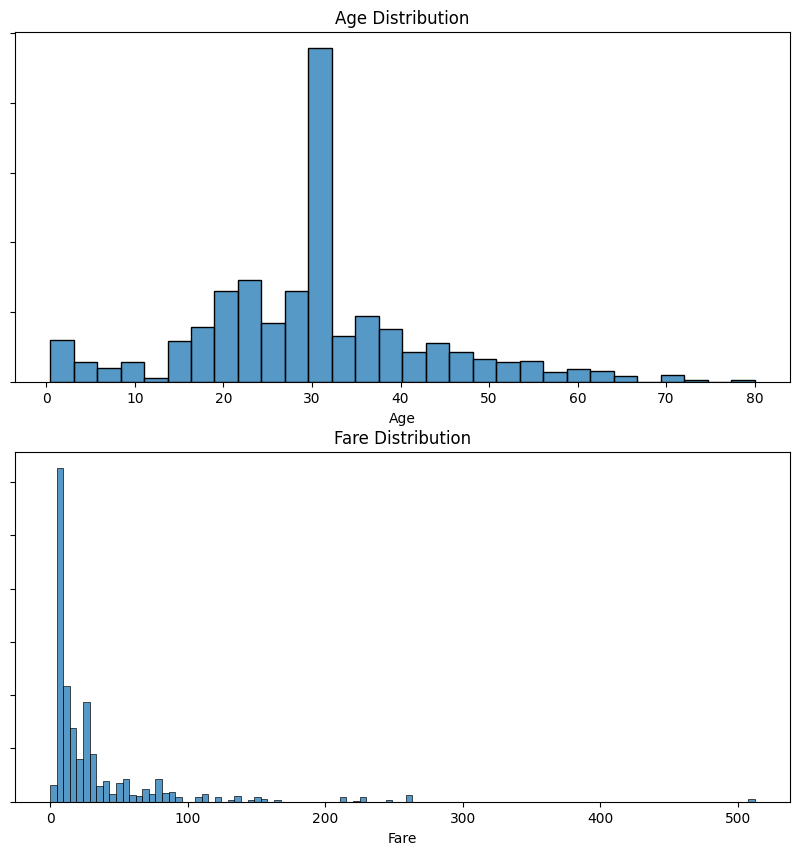

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10, 10))

g1 = sns.histplot(data=df_numeric["Age"],ax=ax[0]) #creates graph

g1.set(yticklabels=[])  # remove the tick labels
g1.set(title='Age Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label


g2 = sns.histplot(data=df_numeric["Fare"],ax=ax[1]) #creates graph

g2.set(yticklabels=[])  # remove the tick labels
g2.set(title='Fare Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

plt.show()

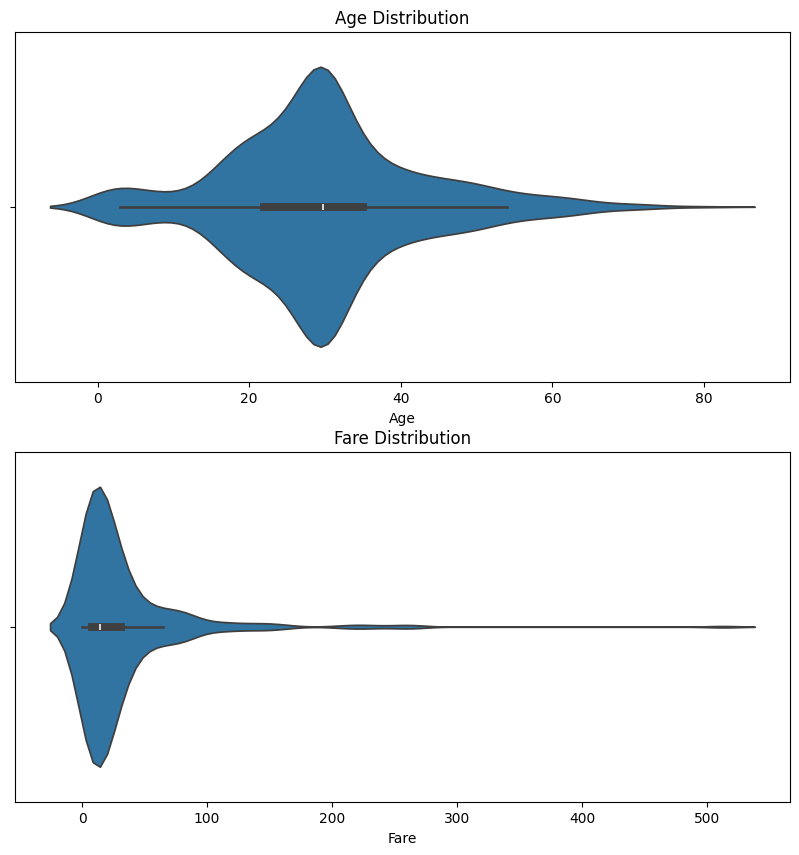

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10, 10))

g1 = sns.violinplot(x=df_numeric["Age"],ax=ax[0]) #creates graph

g1.set(yticklabels=[])  # remove the tick labels
g1.set(title='Age Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label


g2 = sns.violinplot(x=df_numeric["Fare"],ax=ax[1]) #creates graph

g2.set(yticklabels=[])  # remove the tick labels
g2.set(title='Fare Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

plt.show()

## Categorical Data

In [68]:
df_categorical.head()

,Sex,Embarked,SibSp,Parch,Pclass
0,male,S,1,0,3
1,female,C,1,0,1
2,female,S,0,0,3
3,female,S,1,0,1
4,male,S,0,0,3


<Axes: xlabel='Embarked'>

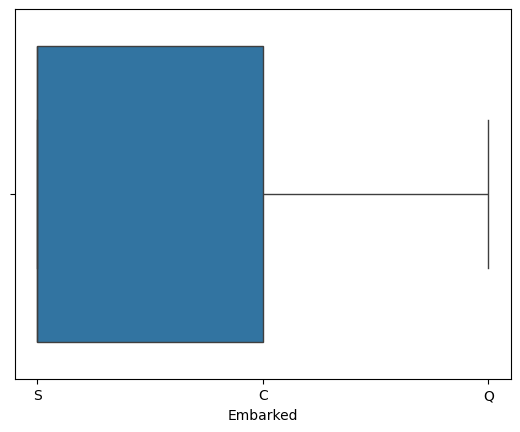

In [74]:
sns.boxplot(x=df_categorical["Embarked"]) #creates graph

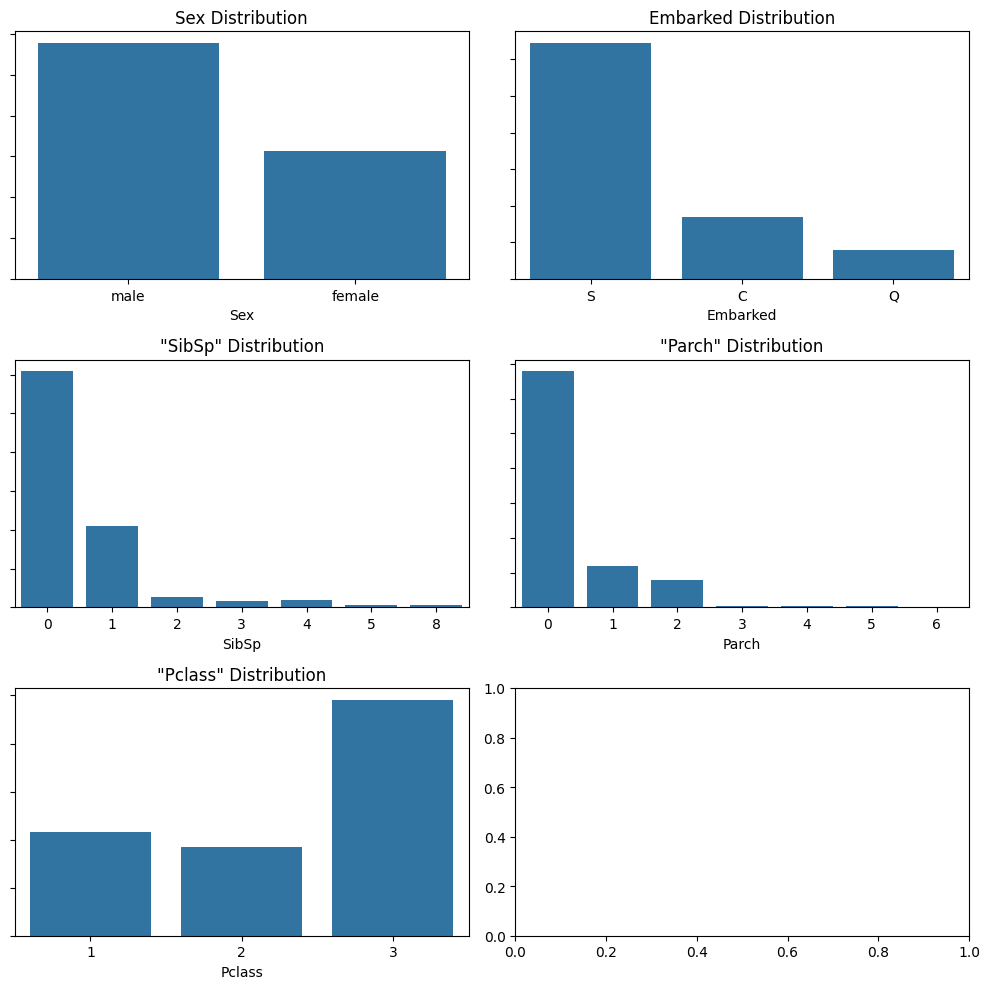

In [78]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(10, 10))

g1 = sns.countplot(x=df_categorical["Sex"],ax=ax[0,0]) #creates graph

g1.set(yticklabels=[])  # remove the tick labels
g1.set(title='Sex Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label


g2 = sns.countplot(x=df_categorical["Embarked"],ax=ax[0,1]) #creates graph

g2.set(yticklabels=[])  # remove the tick labels
g2.set(title='Embarked Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

g3 = sns.countplot(x=df_categorical["SibSp"],ax=ax[1,0]) #creates graph

g3.set(yticklabels=[])  # remove the tick labels
g3.set(title='"SibSp" Distribution')  # add a title
g3.set(ylabel=None)  # remove the axis label


g4 = sns.countplot(x=df_categorical["Parch"],ax=ax[1,1]) #creates graph

g4.set(yticklabels=[])  # remove the tick labels
g4.set(title='"Parch" Distribution')  # add a title
g4.set(ylabel=None)  # remove the axis label

g5 = sns.countplot(x=df_categorical["Pclass"],ax=ax[2,0]) #creates graph

g5.set(yticklabels=[])  # remove the tick labels
g5.set(title='"Pclass" Distribution')  # add a title
g5.set(ylabel=None)  # remove the axis label

fig.tight_layout()
plt.show()

# Explorin Composition

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


<Axes: xlabel='Sex', ylabel='Survived'>

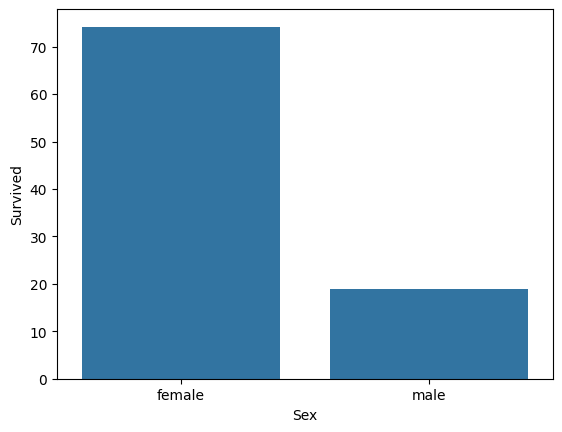

In [74]:
#Sex and Survivement
Sex_Survived = df[["Sex","Survived"]].groupby(["Sex"]).mean()*100
sns.barplot(data=Sex_Survived, x="Sex",y="Survived")

<Axes: xlabel='Pclass', ylabel='Survived'>

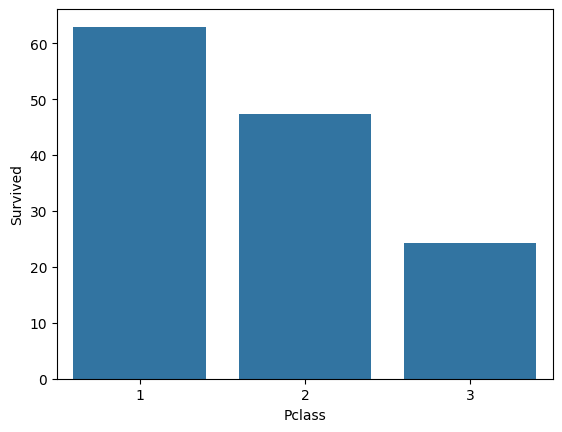

In [75]:
#Pclass and Survivement
Pclass_Survived = df[["Pclass","Survived"]].groupby(["Pclass"]).mean()*100

sns.barplot(data=Pclass_Survived, x="Pclass", y="Survived")

In [79]:
#SibSp and Survivement
SibSp_Survived = df[["SibSp","Survived"]].groupby(["SibSp"]).mean()*100
SibSp_Survived.reset_index()
SibSp_Survived.head()
# SibSp_Survived.sort_index()
# sns.barplot(data=SibSp_Survived, x="SibSp", y="Survived")

,Survived
SibSp,
0,34.539474
1,53.588517
2,46.428571
3,25.000000
4,16.666667


In [25]:
#Embarked and Survivement
df[["Embarked","Survived"]].groupby(["Embarked"]).mean()*100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


In [28]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [7]:
bins = [-np.inf,8,15,31,np.inf]
labels = ["bajo","medio","medio-alto","alto"]

df["Fare Category"] = pd.cut(df["Fare"],bins,labels=labels)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,bajo
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,alto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,bajo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,alto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,medio


In [25]:
#Fare and Survivement
Fare_Survivement = df[["Fare Category","Survived"]].groupby(["Fare Category"], observed=False).mean()*100
Fare_Survivement

,Survived
Fare Category,
bajo,21.576763
medio,28.571429
medio-alto,46.919431
alto,58.108108


<Axes: xlabel='Fare Category', ylabel='Survived'>

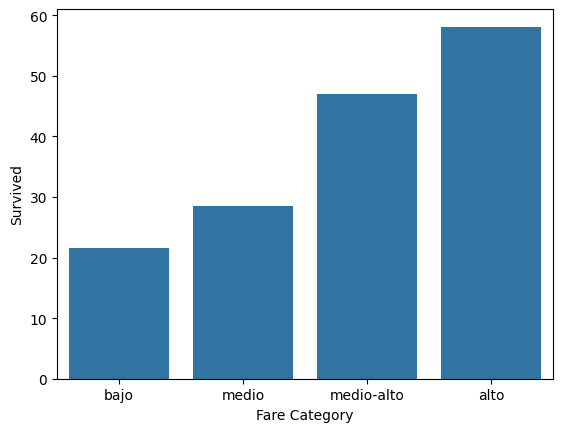

In [28]:
sns.barplot(Fare_Survivement, x = "Fare Category", y="Survived")

In [30]:
bins = [-np.inf,1,3,5,12,18,25,64,np.inf]
labels = ["baby","Toddler","Preschool","Grandchooler","Teen","Young Adult","Adult","Senior"]

df["Age Category"] = pd.cut(df["Age"],bins,labels=labels)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare Category,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,bajo,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,alto,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,bajo,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,alto,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,medio,Adult


In [70]:
#Age and Survivement
Age_category_Survived = df[["Age Category","Survived"]].groupby(["Age Category"], observed=False).mean()*100
Age_category_Survived = Age_category_Survived.sort_values(by="Survived",ascending=False).reset_index()
Age_category_Survived.reset_index(drop=True)
Age_category_Survived.head(10)

,Age Category,Survived
0,baby,85.714286
1,Preschool,78.571429
2,Toddler,50.000000
3,Teen,42.857143
4,Adult,41.044776
5,Grandchooler,36.000000
6,Young Adult,33.333333
7,Senior,9.090909


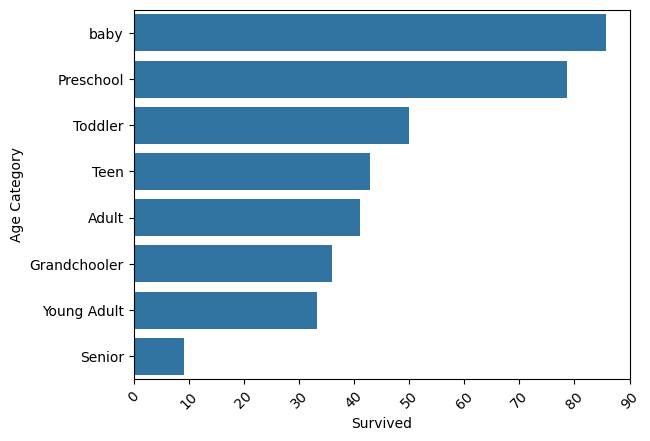

In [69]:
sns.barplot(data=Age_category_Survived, y="Age Category",x="Survived",order=["baby","Preschool","Toddler","Teen","Adult","Grandchooler","Young Adult","Senior"])
plt.xticks(rotation=45)
plt.show()

# Exploring name titles 

In [6]:
import re

In [26]:
# Regular expression pattern to match common name titles
pattern = r"(Mr\.|Master\.|Mrs\.|Miss\.)\s+"

df[~df_categorical["Name"].str.contains(pattern, regex=True)][["Name","Survived"]]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8828\3111748349.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[~df_categoric["Name"].str.contains(pattern, regex=True)][["Name","Survived"]]


,Name,Survived
30,"Uruchurtu, Don. Manuel E",0
149,"Byles, Rev. Thomas Roussel Davids",0
150,"Bateman, Rev. Robert James",0
245,"Minahan, Dr. William Edward",0
249,"Carter, Rev. Ernest Courtenay",0
317,"Moraweck, Dr. Ernest",0
369,"Aubart, Mme. Leontine Pauline",1
398,"Pain, Dr. Alfred",0
443,"Reynaldo, Ms. Encarnacion",1
449,"Peuchen, Major. Arthur Godfrey",1
